# TP1

## 1. Methode d'inversion

### Exercice 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

1. 

$$\mathbb{P}(X=1) = \mathbb{P}(U \leq p) = \int_0^p du = p$$
$$\mathbb{P}(X=0) = 1 - \mathbb{P}(U \leq p) = 1-p$$

In [ ]:
# 2.

import numpy as np

def sample_bernoulli(p, N):
    res = []
    for _ in range(N):
        U = np.random.rand()
        # if U <= p:
        #     res.append(1)
        # else:
        #     res.append(0)
        res.append(int(U <= p))
    return res

In [ ]:
# 3.

N_list = [100, 1000, 10000]
p = 0.3

for N in N_list:
    print(sum(sample_bernoulli(p, N)) / N)

In [ ]:
# 4.

# (a & b)

p = 0.3
n = 40

mu = p
sigma = np.sqrt(p*(1-p))

N = 100000
Z_n_list = []

for _ in range(N):
    X_n_bar = np.mean(sum(sample_bernoulli(p, n)) / n)
    Z_n_list.append(np.sqrt(n) * (X_n_bar - mu) / sigma)

plt.hist(Z_n_list, density=True)

# N(0,1) plot
x = np.linspace(-4,4)
plt.plot(x, stats.norm.pdf(x,0,1))

### Exercice 2

In [ ]:
# 2.

def sample_binomial(n, p, N):
    res = []
    for _ in range(N):
        s = 0
        for _ in range(n):
            U = np.random.rand()
            s += int(U <= p)
        res.append(s)
    return res

In [ ]:
# 3.

N = 10000
n = 30
p = 0.1

sample_binomial_list = sample_binomial(n, p, N)
plt.hist(sample_binomial_list)

In [ ]:
# 4.

y_axis = [sum(list(map(int, [X == k for X in sample_binomial_list])))/N
          for k in range(n+1)]

plt.plot([x for x in range(n+1)], y_axis)

In [ ]:
# 5.



### Exercice 3

In [ ]:
# 1.

a_list = [0.5, 1, 1.5, 2]
p_list = [1/4, 1/8, 1/8, 1/2]

c_list = [sum(p_list[0:(i+1)]) for i in range(len(p_list))]

N = 10000

res = []

# algo from slide 1 page 23
for _ in range(N):
    k = 0
    U = np.random.rand()
    while (U > c_list[k] and k < len(p_list)):
        k += 1
    res.append(a_list[k])

plt.hist(res)

In [ ]:
# 2.

plt.plot([1,2,3,4], [1/4, 1/8, 1/8, 1/2])

### Exercice 4

In [ ]:
def one_sample_uniform(increased_support_list):
    k = 0
    U = np.random.rand()
    sum_proba = 1 / len(increased_support_list)
    while (U > sum_proba):
        k += 1
        sum_proba += 1 / len(increased_support_list)

    return increased_support_list[k]

def exercise4(p, n):
    subsets = [[] for _ in range(p)]
    subset_indexes = [i for i in range(1,p+1)]
    E = [i for i in range(1,n+1)]

    # while all subsets contain int(n/p) elements
    while subset_indexes:
        rand_subset = one_sample_uniform(subset_indexes)
        to_add = one_sample_uniform(E)
        subsets[rand_subset-1].append(to_add)
        E.remove(to_add)
        if (len(subsets[rand_subset-1]) == n // p):
            subset_indexes.remove(rand_subset)
    
    # add the rest (n%p) elements to a random subset
    subsets[one_sample_uniform([i for i in range(p)])] += E
    return subsets

exercise4(10,101)

### Exercice 5

In [ ]:
def sample_poisson(lmda, N):
    res = []

    pmf_poisson = lambda x : lmda**x * np.exp(-lmda) / math.factorial(x)

    for _ in range(N):
        U = np.random.rand()
        x = 0
        sum_proba = pmf_poisson(x)
        while (U > sum_proba):
            x += 1
            sum_proba += pmf_poisson(x)
        res.append(x)
    
    return res


def sample_exponential(lmda, N):
    res = []

    inv_cdf_expo = lambda x : -np.log(1-x) / lmda

    for _ in range(N):
        U = np.random.rand()
        res.append(inv_cdf_expo(U))
    
    return res


def sample_weibull(lmda, k, N):
    res = []

    inv_cdf_weibull = lambda x : lmda * (-np.log(1-x))**(1/k)

    for _ in range(N):
        U = np.random.rand()
        res.append(inv_cdf_weibull(U))

    return res

In [ ]:
# dist = 'bern', 'binom', 'pois', 'exp', 'weibull'
def exercise5(dist, param, N):
    match dist:
        case 'bern':
            return sample_bernoulli(param[0], N)
        case 'binom':
            return sample_binomial(param[0], param[1], N)
        case 'pois':
            return sample_poisson(param[0], N)
        case 'exp':
            return sample_exponential(param[0], N)
        case 'weibull':
            return sample_weibull(param[0], param[1], N)
        case _:
            print('Invalid or unsupported distribution')

## 2. Methodes de rejet et de transformation

### Exercice 6

In [ ]:
# 3.

def sample_abs_std_normal(N):
    res = []

    f = lambda x : 2 / np.sqrt(2*np.pi) * np.exp(-x**2/2) * int(x>0)
    g = lambda x : np.exp(-x) * int(x>0)
    inv_cdf_g = lambda x : -np.log(1-x) * int(x>0 and x<1)
    c = np.sqrt(2 * np.e / np.pi)

    for _ in range(N):
        while True:
            U = np.random.rand()

            U_ = np.random.rand()
            Y = inv_cdf_g(U_)

            if U < f(Y) / (c * g(Y)):
                break
        res.append(Y)
    
    return res

In [ ]:
# 4.

N = 100000

plt.hist(sample_abs_std_normal(1000), density=True)

# |X| plot
x = np.linspace(0, 4, num=10000)
f = lambda x : 2 / np.sqrt(2*np.pi) * np.exp(-x**2/2) * int(x>0)
plt.plot(x, list(map(f, x)))

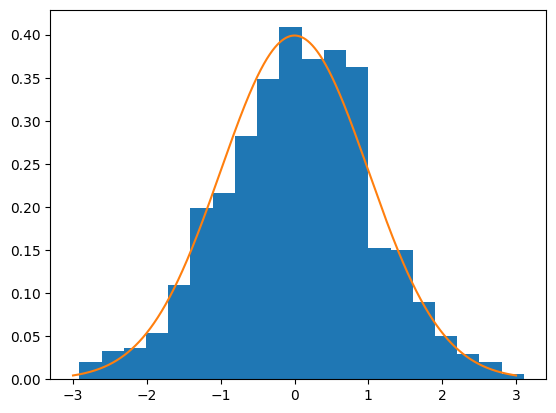

In [122]:
# 6

def sample_std_normal(N):
    return [one_sample_uniform([-1,1]) * i for i in sample_abs_std_normal(N)]



N = 100000

# sample plot
plt.hist(sample_std_normal(1000), density=True, bins=20)

# theoretical plot
x = np.linspace(-3, 3, num=100000)
f = lambda x : 1 / np.sqrt(2*np.pi) * np.exp(-x**2/2)
plt.plot(x, list(map(f, x)))

### Exercice 7

In [ ]:
def sample_unit_circle(N):
    res = [[],[]]

    for _ in range(N):
        while True:
            u1 = 2 * np.random.rand() - 1
            u2 = 2 * np.random.rand() - 1
            if u1*u1 + u2*u2 <= 1:
                break
        res[0].append(u1)
        res[1].append(u2)
    
    return res

sample_unit_circle_list = sample_unit_circle(10000)
plt.scatter(sample_unit_circle_list[0], sample_unit_circle_list[1])

### Exercice 8

In [ ]:
def sample_unit_sphere(N):
    res = [[],[],[]]

    for _ in range(N):
        while True:
            u1 = 2 * np.random.rand() - 1
            u2 = 2 * np.random.rand() - 1
            u3 = 2 * np.random.rand() - 1
            if u1*u1 + u2*u2 + u3*u3 <= 1:
                break
        res[0].append(u1)
        res[1].append(u2)
        res[2].append(u3)
    
    return res

sample_unit_sphere_list = sample_unit_sphere(10000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sample_unit_sphere_list[0],
           sample_unit_sphere_list[1],
           sample_unit_sphere_list[2])

### Exercice 9

In [ ]:
#2

def sample_bi_gaussian(N):
    res = [[],[]]

    for _ in range(N):
        Theta = np.random.rand() * 2 * np.pi
        R = sample_exponential(1/2, 1)[0]
        res[0].append(np.sqrt(R) * np.cos(Theta))
        res[1].append(np.sqrt(R) * np.sin(Theta))

    return res

s = sample_bi_gaussian(10000)
plt.scatter(s[0], s[1])

### Exercice 11

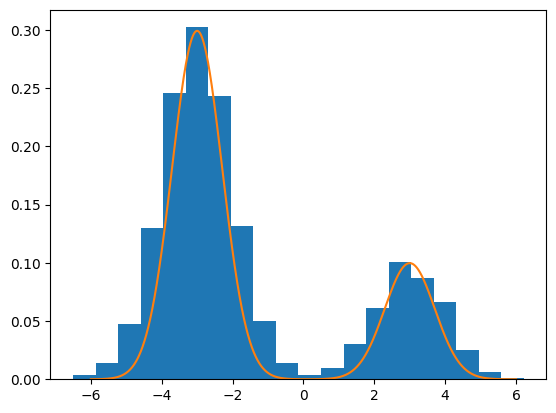

In [142]:
def exercise11(mu, sigma, p, N):
    res = sample_std_normal(N)

    for i in range(len(res)):
        U = np.random.rand()
        res[i] = res[i] * (sigma[0] if U < p[0] else sigma[1]) + (mu[0] if U < p[0] else mu[1])
    
    return res



pdf_normal = lambda mu,sigma,x : 1 / (np.sqrt(2*np.pi)*sigma) * np.exp(-((x-mu)/sigma)**2)

# # sample plot
# plt.hist(exercise11([-3,3], [1,1], [1/2,1/2], 10000), density=True, bins=20)

# # theoretical plot
# x = np.linspace(-6, 6, num=10000)
# f = lambda x : 1/2*pdf_normal(-3,1,x) + 1/2*pdf_normal(3,1,x)
# plt.plot(x, list(map(f, x)))

# sample plot
plt.hist(exercise11([-3,3], [1,1], [3/4,1/4], 10000), density=True, bins=20)

# theoretical plot
x = np.linspace(-6, 6, num=10000)
f = lambda x : 3/4*pdf_normal(-3,1,x) + 1/4*pdf_normal(3,1,x)
plt.plot(x, list(map(f, x)))